<a href="https://colab.research.google.com/github/JHWannabe/Python-AI_4_2/blob/main/0209%20Day9/12_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 회귀(Regression) 예측**

* 수치형 값을 예측(Y의 값이 연속된 수치로 표현)
* 예) 주택 가격 예측, 매출액 예측
* [도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)


In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True) # e 표현을 일반 숫자로 변경

In [2]:
from sklearn.datasets import load_boston

In [3]:
# 데이터 로드
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
# 요약정보
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# data['data']에는 x 데이터, data['feature_name']에는 컬럼명
df = pd.DataFrame(data['data'], columns=data['feature_names'])

In [6]:
# y 데이터 price를 데이터프레임에 추가
df['MEDV'] = data['target']
# 데이터 확인
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### **컬럼**
속성수 : 13
* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [9]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [10]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
179,0.05780,0.0,2.46,0.0,0.488,6.980,58.4,2.8290,3.0,193.0,17.8,396.90,5.04
368,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24.0,666.0,20.2,319.98,15.70
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73


In [11]:
y_train.head()

179    37.2
368    50.0
421    14.2
224    44.8
319    21.0
Name: MEDV, dtype: float64

# **2. 평가 지표**

### **2-1. MSE(Mean Squared Error)**

* ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값


### **2-2. MAE(Mean Absolute Error)**

* $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

* 예측값과 실제값의 차이에 대한 절대값에 대하여 평균을 낸 값

### **2-3. RMSE(Root Mean Squared Error)**

* $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 뒤 루트를 씌운 값

In [12]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [13]:
def my_mse(pred, actual):  # 4.0
  return ((pred - actual)**2).mean()

In [14]:
my_mse(pred, actual)

4.0

In [15]:
def my_mae(pred, actual):  # 2.0
  return np.abs(pred - actual).mean()

In [16]:
my_mae(pred, actual)

2.0

In [17]:
def my_rmse(pred, actual):  # 2.0
  return np.sqrt(my_mse(pred, actual))

In [18]:
my_rmse(pred, actual)

2.0

### **2-4. sklearn의 평가지표 활용**

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [21]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

# **3. 모델별 성능 확인을 위한 함수**

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

# **4. Linear Regression**

* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression(n_jobs=-1)

In [25]:
model.fit(x_train, y_train)
# 기본값 : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

LinearRegression(n_jobs=-1)

In [26]:
pred = model.predict(x_test)

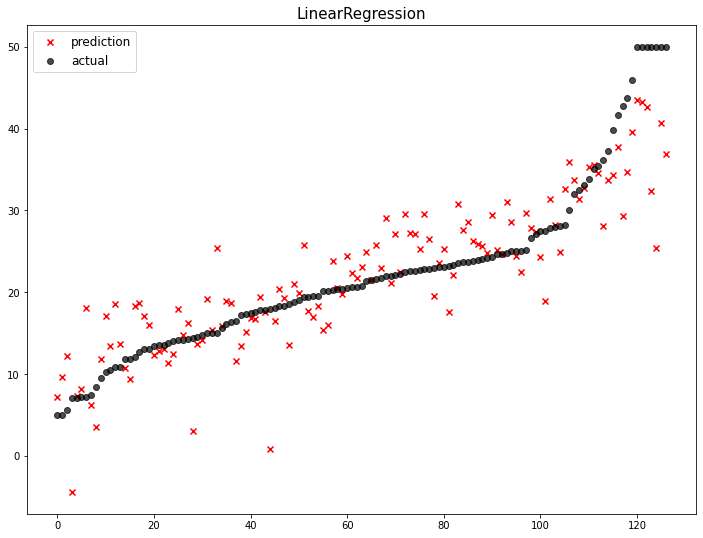

              model        mse
0  LinearRegression  30.153571


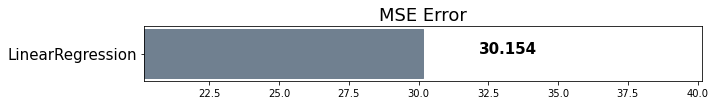

In [27]:
mse_eval('LinearRegression', pred, y_test)

# **5. 규제(Regularization)**

* 학습이 과대적합되는 것을 방지하고자 일종의 penalty를 부여하는 것
* L2 규제 (릿지, Ridge)
 - 각 가중치 제곱의 합에 규제 강도 λ를 곱함
 - λ를 크게 하면 가중치가 더 많이 감소되고 (규제를 중요시함)
 - λ를 작게 하면 가중치가 증가함(규제를 중요시 하지 않음)
 - $Error=MSE+αw^2$
* L1 규제 (라쏘, Lasso)
 - 가중치의 제곱의 합이 아닌 가중치의 합을 더한 값에 규제 강도 λ를 곱하여 오차에 더함
 - 어떤 가중치(w)는 실제로 0이 됨. 즉, 모델에서 완전히 제외되는 특성이 생김
 - $Error=MSE+α|w|$


> L2 규제가 L1 규제에 비해 안정적이라 일반적으로 L2 규제가 더 많이 사용(알고리즘)

### **5-1. 릿지(Ridge)**

In [28]:
from sklearn.linear_model import Ridge

In [29]:
# 값이 클수록 큰 규제 (규제 강도)
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

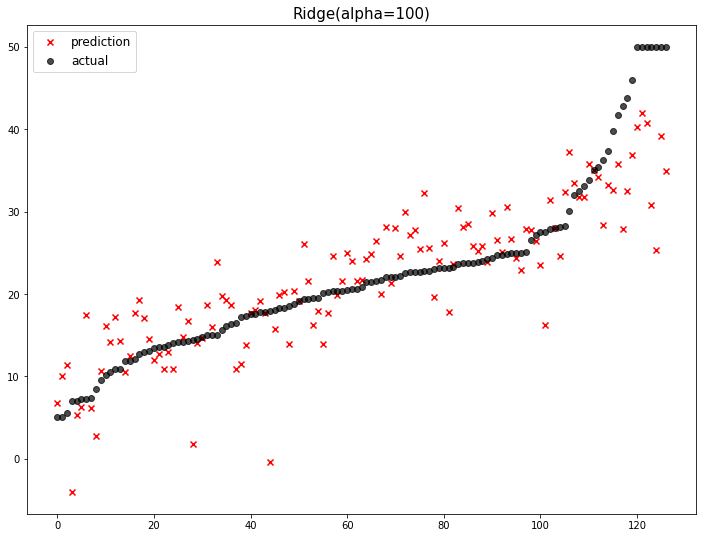

              model        mse
0  Ridge(alpha=100)  34.931758
1  LinearRegression  30.153571


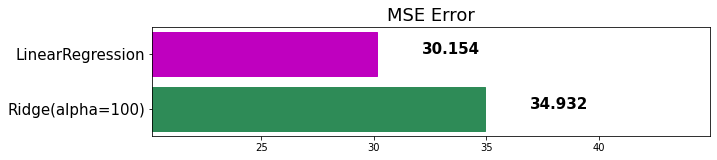

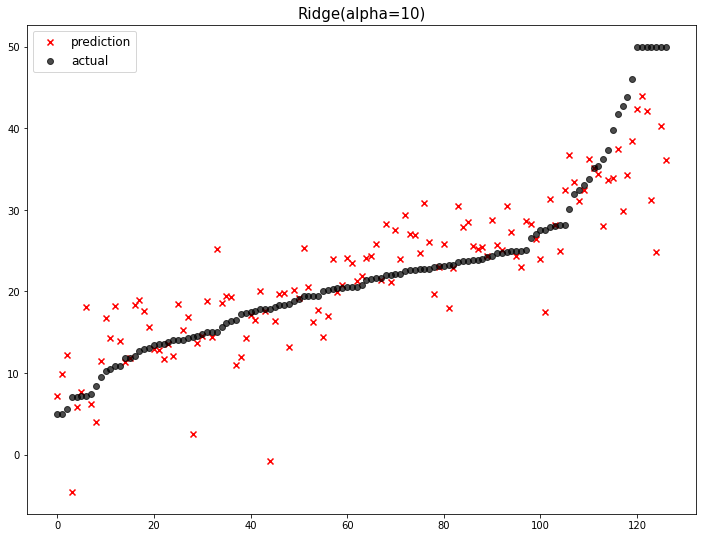

              model        mse
0  Ridge(alpha=100)  34.931758
1   Ridge(alpha=10)  32.042623
2  LinearRegression  30.153571


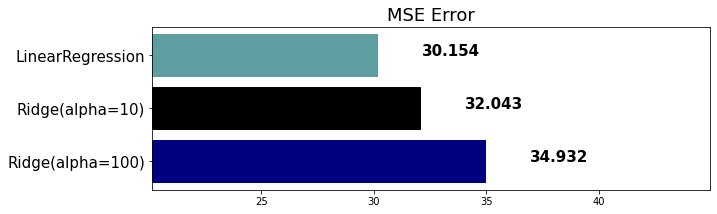

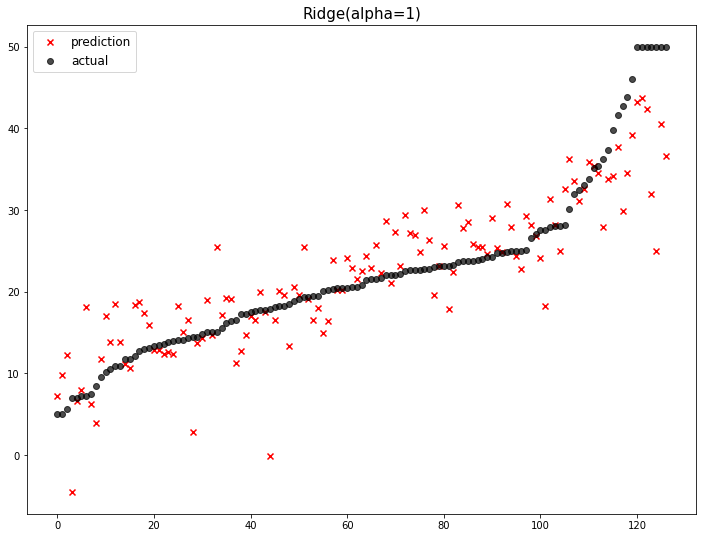

              model        mse
0  Ridge(alpha=100)  34.931758
1   Ridge(alpha=10)  32.042623
2    Ridge(alpha=1)  30.743161
3  LinearRegression  30.153571


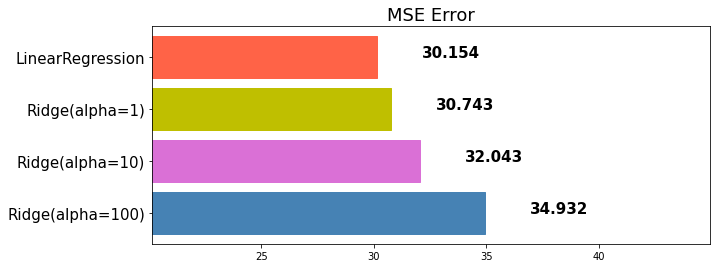

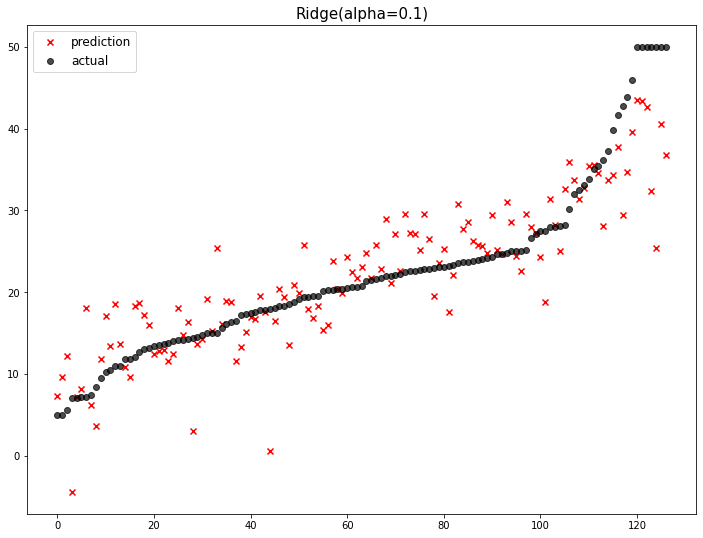

              model        mse
0  Ridge(alpha=100)  34.931758
1   Ridge(alpha=10)  32.042623
2    Ridge(alpha=1)  30.743161
3  Ridge(alpha=0.1)  30.225624
4  LinearRegression  30.153571


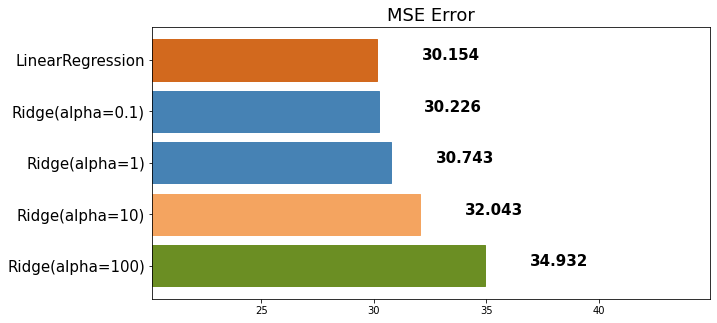

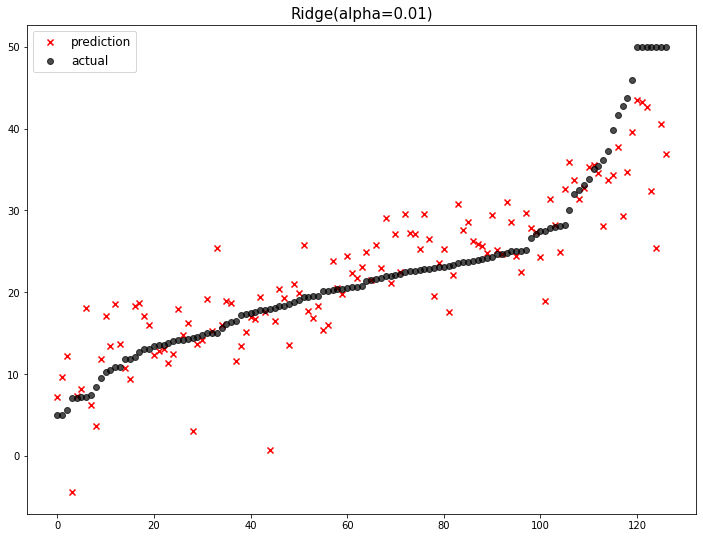

               model        mse
0   Ridge(alpha=100)  34.931758
1    Ridge(alpha=10)  32.042623
2     Ridge(alpha=1)  30.743161
3   Ridge(alpha=0.1)  30.225624
4  Ridge(alpha=0.01)  30.160783
5   LinearRegression  30.153571


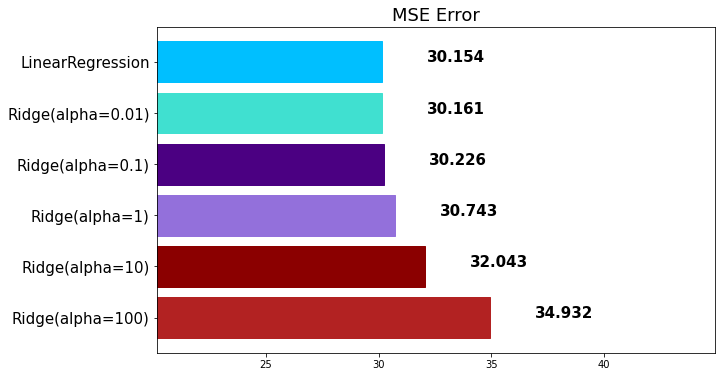

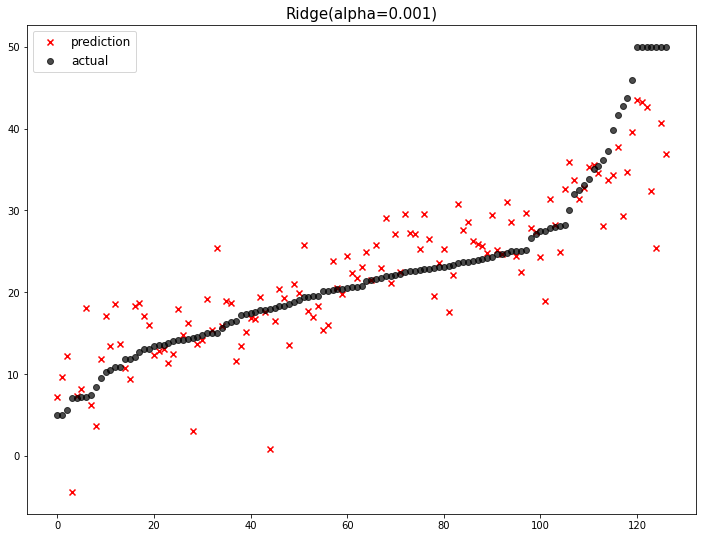

                model        mse
0    Ridge(alpha=100)  34.931758
1     Ridge(alpha=10)  32.042623
2      Ridge(alpha=1)  30.743161
3    Ridge(alpha=0.1)  30.225624
4   Ridge(alpha=0.01)  30.160783
5  Ridge(alpha=0.001)  30.154292
6    LinearRegression  30.153571


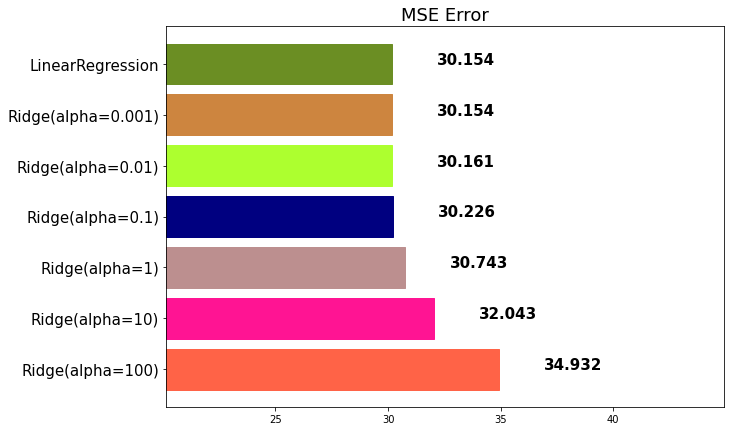

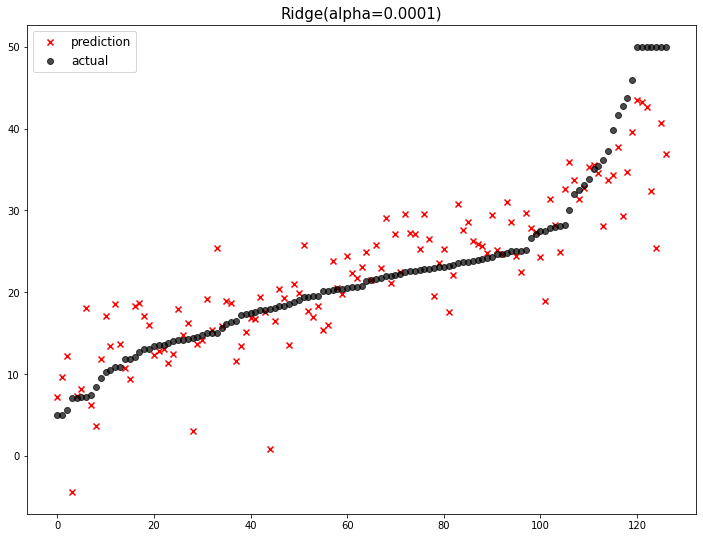

                 model        mse
0     Ridge(alpha=100)  34.931758
1      Ridge(alpha=10)  32.042623
2       Ridge(alpha=1)  30.743161
3     Ridge(alpha=0.1)  30.225624
4    Ridge(alpha=0.01)  30.160783
5   Ridge(alpha=0.001)  30.154292
6  Ridge(alpha=0.0001)  30.153643
7     LinearRegression  30.153571


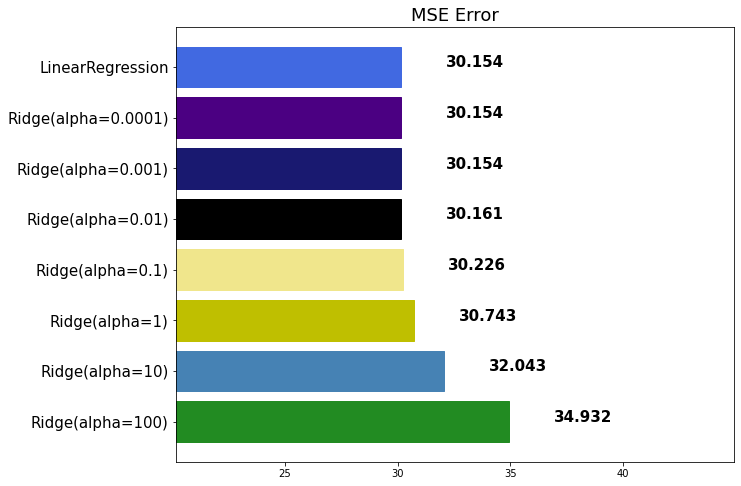

In [30]:
for alpha in alphas:
  ridge = Ridge(alpha=alpha)
  ridge.fit(x_train, y_train)
  pred = ridge.predict(x_test)
  mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [31]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [32]:
ridge.coef_

array([ -0.08957667,   0.0421581 ,  -0.02033845,   1.94643669,
       -15.64541223,   3.28921328,   0.00453325,  -1.40862335,
         0.33060719,  -0.01188556,  -1.05825304,   0.01292855,
        -0.57209332])

In [33]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()


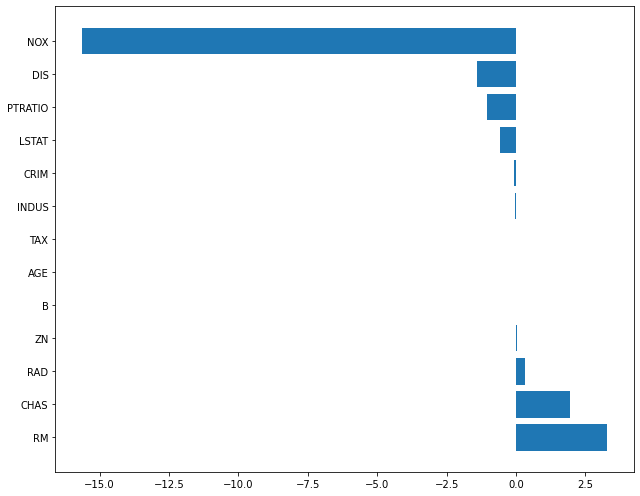

In [34]:
plot_coef(x_train.columns, ridge.coef_)

In [35]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_100.predict(x_test)

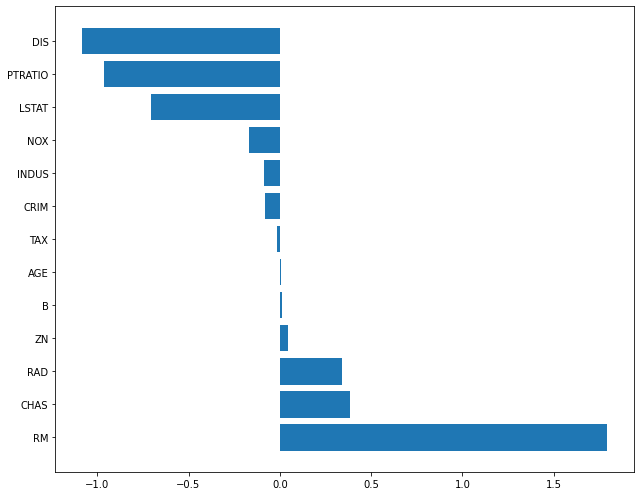

In [36]:
plot_coef(x_train.columns, ridge_100.coef_)

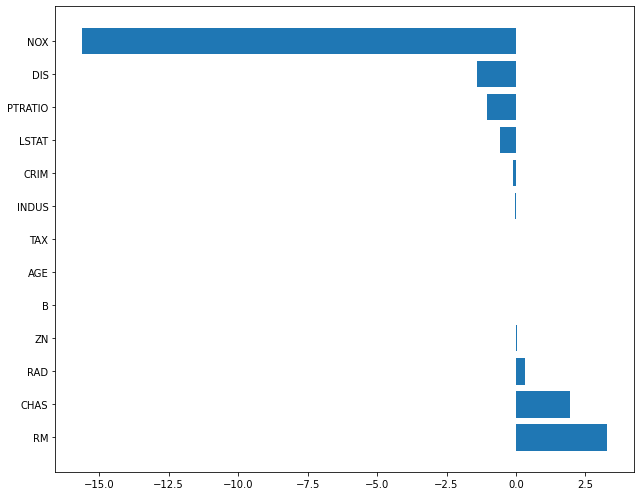

In [37]:
plot_coef(x_train.columns, ridge_001.coef_)

### **5-2. 라쏘(Lasso)**

In [38]:
from sklearn.linear_model import Lasso

In [39]:
# 값이 클수록 큰 규제
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

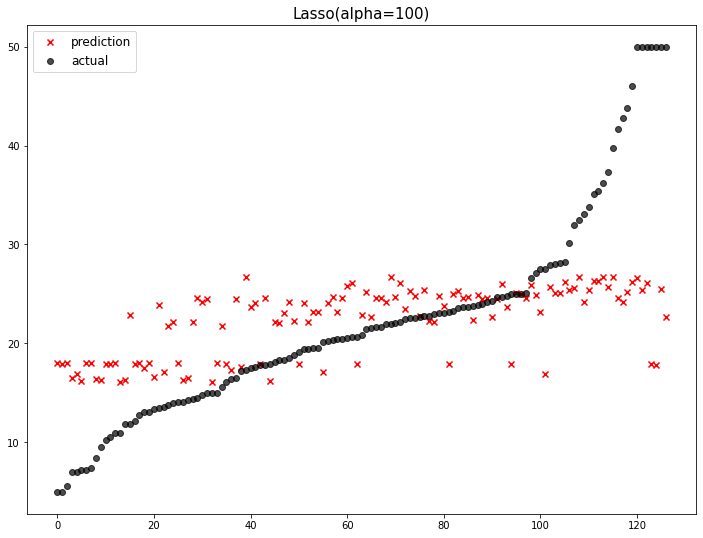

                 model        mse
0     Lasso(alpha=100)  82.434151
1     Ridge(alpha=100)  34.931758
2      Ridge(alpha=10)  32.042623
3       Ridge(alpha=1)  30.743161
4     Ridge(alpha=0.1)  30.225624
5    Ridge(alpha=0.01)  30.160783
6   Ridge(alpha=0.001)  30.154292
7  Ridge(alpha=0.0001)  30.153643
8     LinearRegression  30.153571


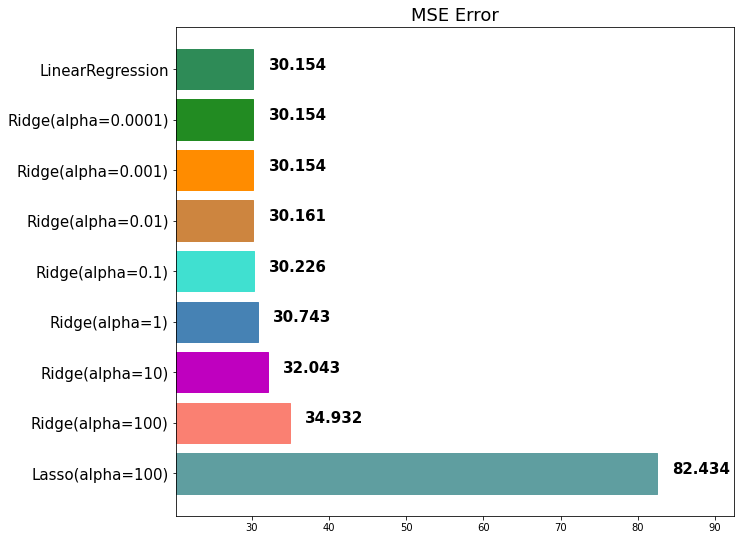

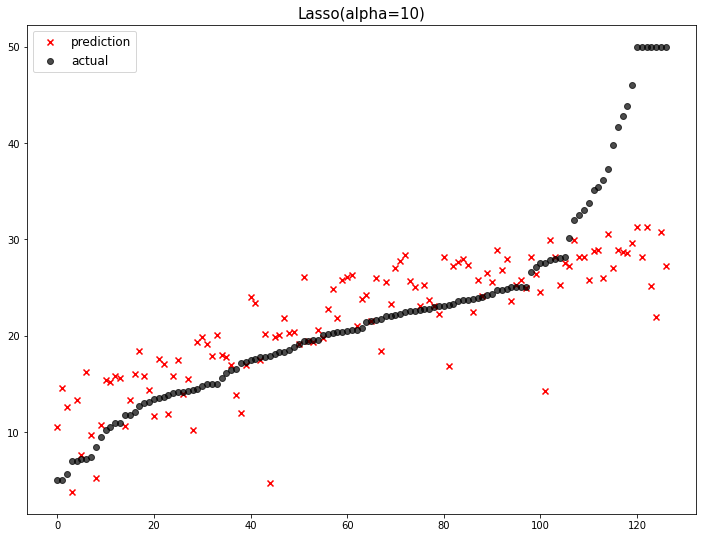

                 model        mse
0     Lasso(alpha=100)  82.434151
1      Lasso(alpha=10)  51.397542
2     Ridge(alpha=100)  34.931758
3      Ridge(alpha=10)  32.042623
4       Ridge(alpha=1)  30.743161
5     Ridge(alpha=0.1)  30.225624
6    Ridge(alpha=0.01)  30.160783
7   Ridge(alpha=0.001)  30.154292
8  Ridge(alpha=0.0001)  30.153643
9     LinearRegression  30.153571


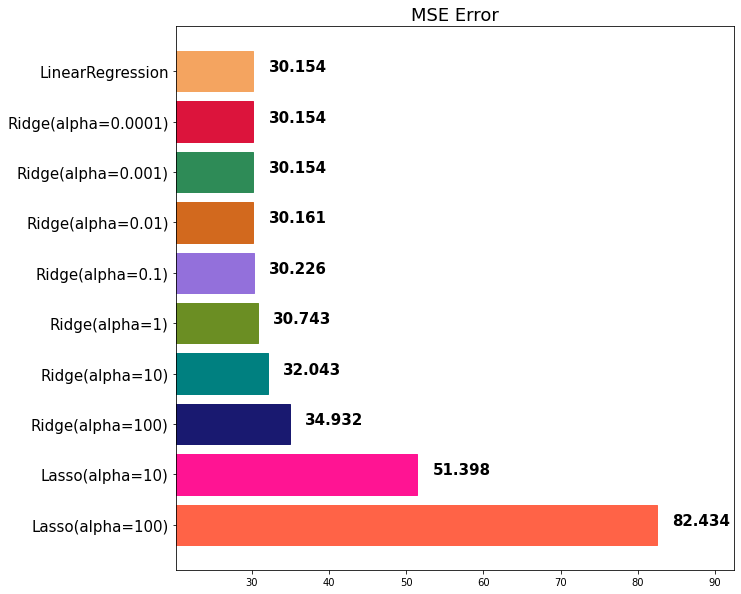

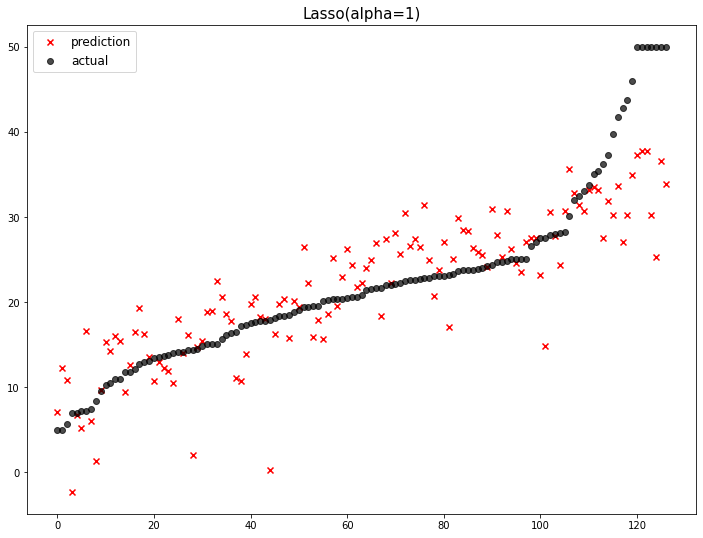

                  model        mse
0      Lasso(alpha=100)  82.434151
1       Lasso(alpha=10)  51.397542
2        Lasso(alpha=1)  39.093494
3      Ridge(alpha=100)  34.931758
4       Ridge(alpha=10)  32.042623
5        Ridge(alpha=1)  30.743161
6      Ridge(alpha=0.1)  30.225624
7     Ridge(alpha=0.01)  30.160783
8    Ridge(alpha=0.001)  30.154292
9   Ridge(alpha=0.0001)  30.153643
10     LinearRegression  30.153571


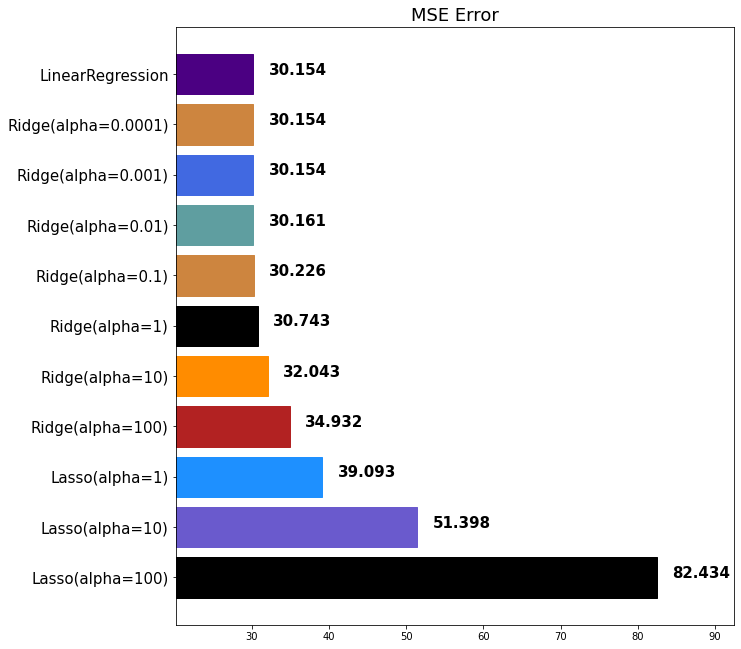

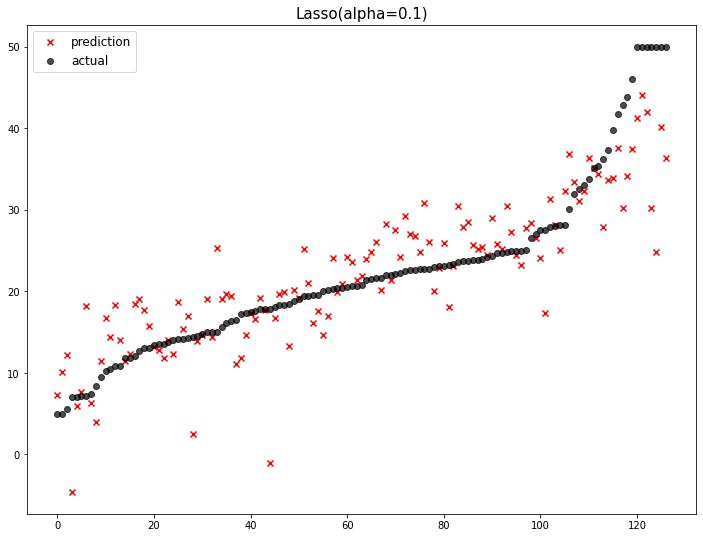

                  model        mse
0      Lasso(alpha=100)  82.434151
1       Lasso(alpha=10)  51.397542
2        Lasso(alpha=1)  39.093494
3      Ridge(alpha=100)  34.931758
4      Lasso(alpha=0.1)  32.703992
5       Ridge(alpha=10)  32.042623
6        Ridge(alpha=1)  30.743161
7      Ridge(alpha=0.1)  30.225624
8     Ridge(alpha=0.01)  30.160783
9    Ridge(alpha=0.001)  30.154292
10  Ridge(alpha=0.0001)  30.153643
11     LinearRegression  30.153571


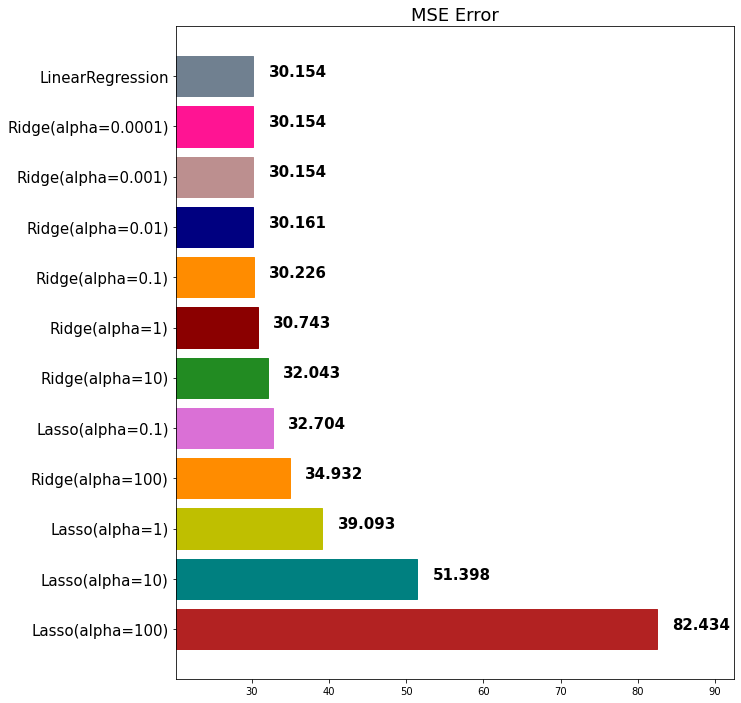

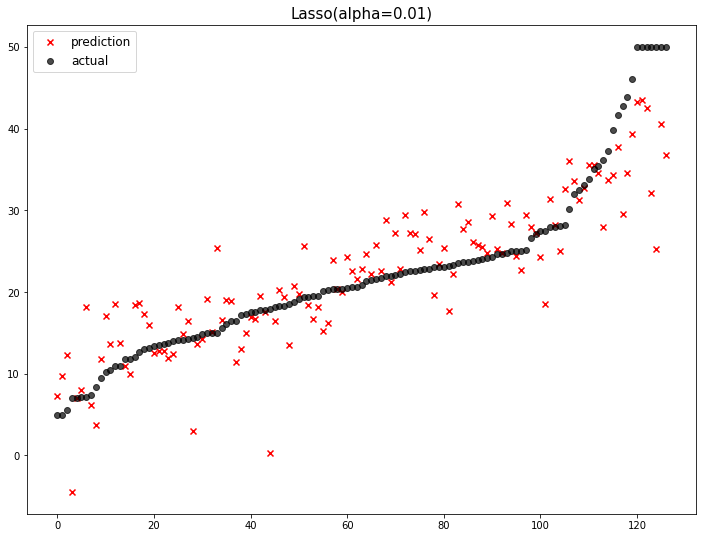

                  model        mse
0      Lasso(alpha=100)  82.434151
1       Lasso(alpha=10)  51.397542
2        Lasso(alpha=1)  39.093494
3      Ridge(alpha=100)  34.931758
4      Lasso(alpha=0.1)  32.703992
5       Ridge(alpha=10)  32.042623
6        Ridge(alpha=1)  30.743161
7     Lasso(alpha=0.01)  30.438067
8      Ridge(alpha=0.1)  30.225624
9     Ridge(alpha=0.01)  30.160783
10   Ridge(alpha=0.001)  30.154292
11  Ridge(alpha=0.0001)  30.153643
12     LinearRegression  30.153571


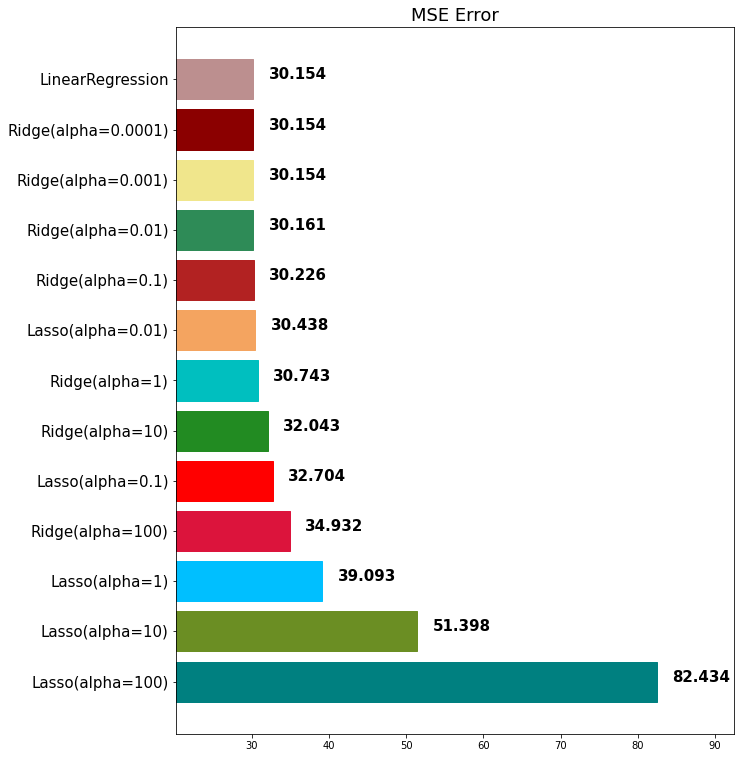

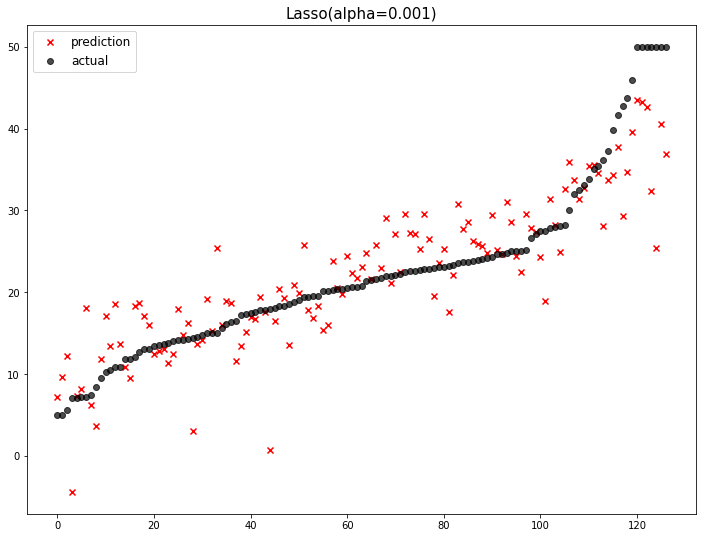

                  model        mse
0      Lasso(alpha=100)  82.434151
1       Lasso(alpha=10)  51.397542
2        Lasso(alpha=1)  39.093494
3      Ridge(alpha=100)  34.931758
4      Lasso(alpha=0.1)  32.703992
5       Ridge(alpha=10)  32.042623
6        Ridge(alpha=1)  30.743161
7     Lasso(alpha=0.01)  30.438067
8      Ridge(alpha=0.1)  30.225624
9    Lasso(alpha=0.001)  30.178342
10    Ridge(alpha=0.01)  30.160783
11   Ridge(alpha=0.001)  30.154292
12  Ridge(alpha=0.0001)  30.153643
13     LinearRegression  30.153571


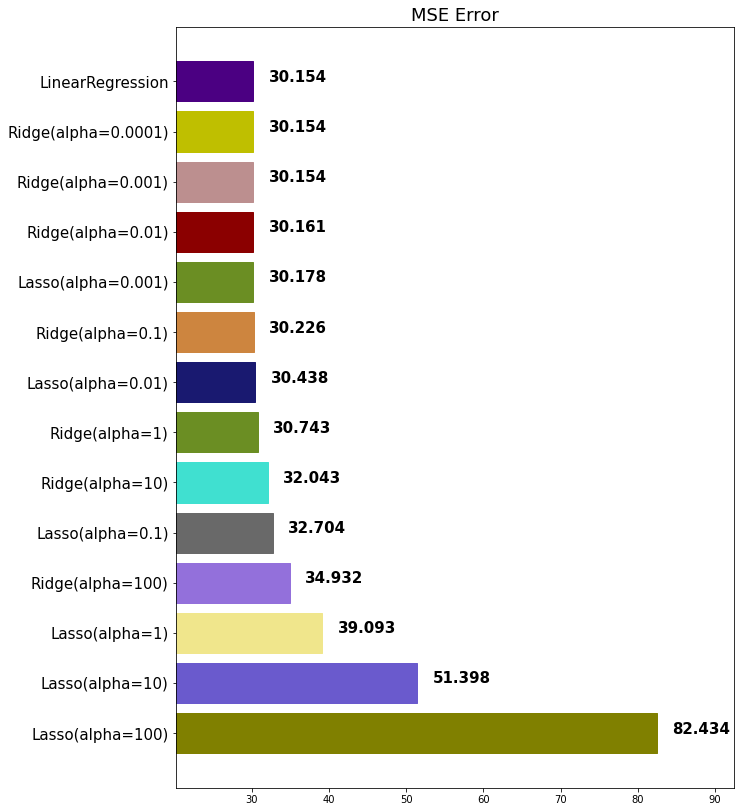

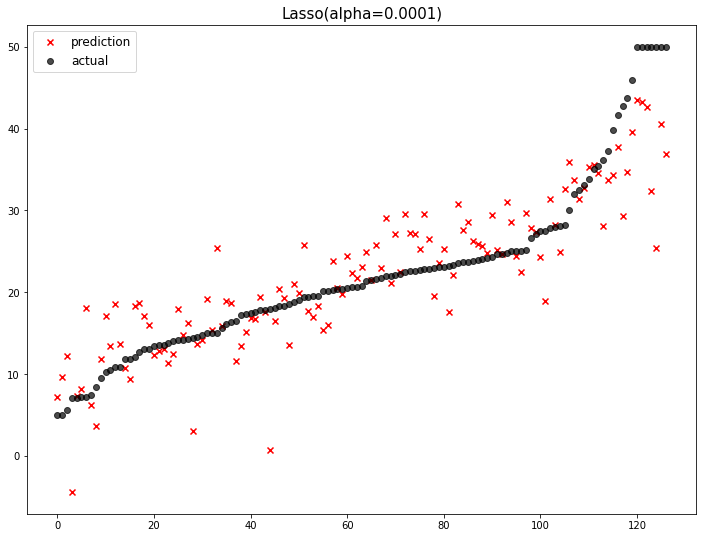

                  model        mse
0      Lasso(alpha=100)  82.434151
1       Lasso(alpha=10)  51.397542
2        Lasso(alpha=1)  39.093494
3      Ridge(alpha=100)  34.931758
4      Lasso(alpha=0.1)  32.703992
5       Ridge(alpha=10)  32.042623
6        Ridge(alpha=1)  30.743161
7     Lasso(alpha=0.01)  30.438067
8      Ridge(alpha=0.1)  30.225624
9    Lasso(alpha=0.001)  30.178342
10    Ridge(alpha=0.01)  30.160783
11  Lasso(alpha=0.0001)  30.156011
12   Ridge(alpha=0.001)  30.154292
13  Ridge(alpha=0.0001)  30.153643
14     LinearRegression  30.153571


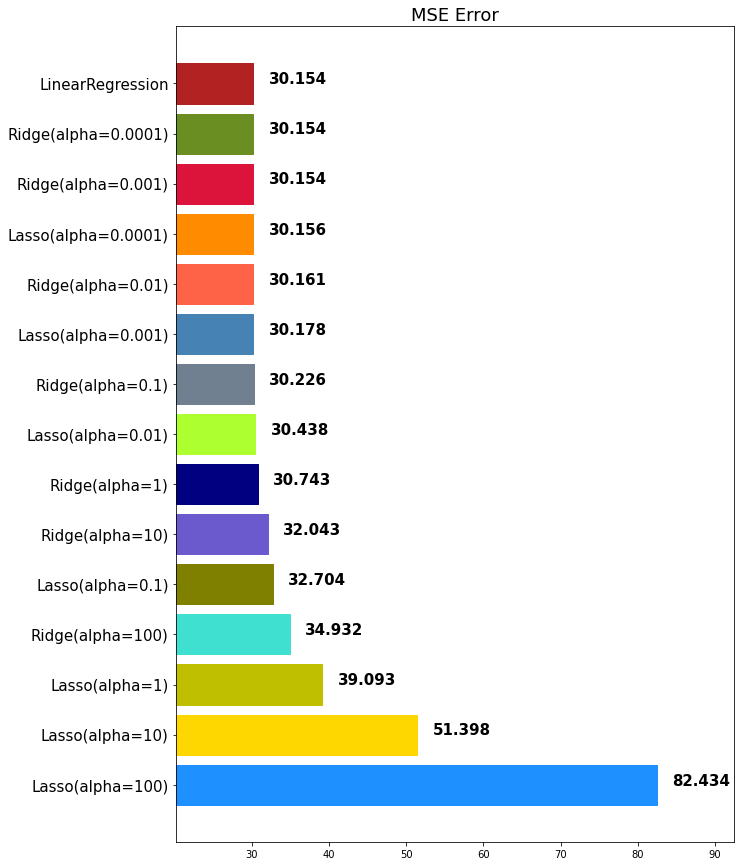

In [40]:
for alpha in alphas:
  lasso = Lasso(alpha=alpha)
  lasso.fit(x_train, y_train)
  pred = lasso.predict(x_test)
  mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [41]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_100.predict(x_test)

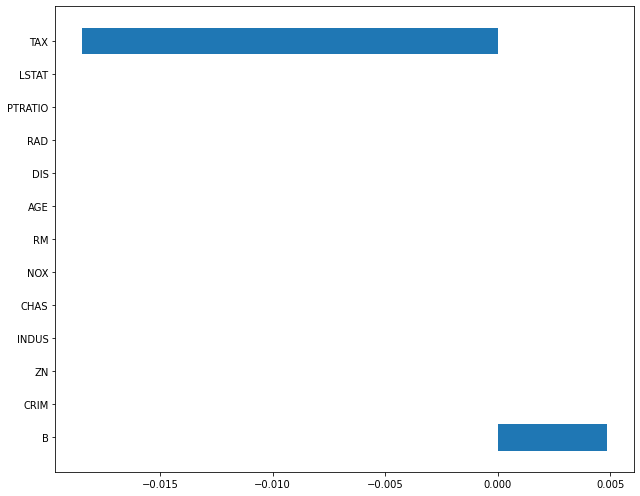

In [42]:
plot_coef(x_train.columns, lasso_100.coef_)

In [43]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.01848096,
       -0.        ,  0.00485989, -0.        ])

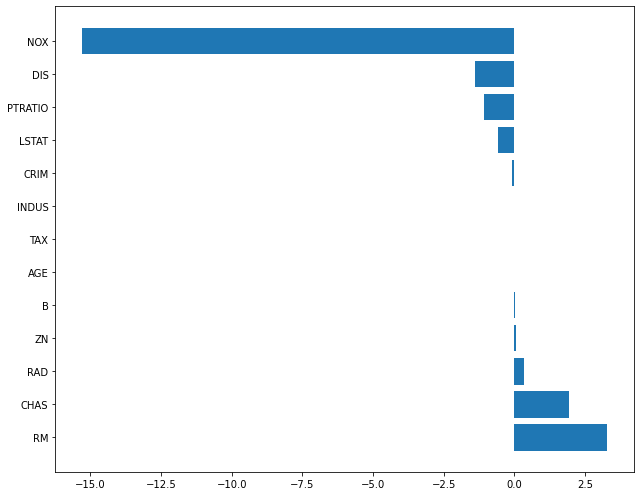

In [44]:
plot_coef(x_train.columns, lasso_001.coef_)

In [45]:
lasso_001.coef_

array([ -0.08943051,   0.04218454,  -0.02143651,   1.92694306,
       -15.30453568,   3.29042182,   0.00424228,  -1.40307402,
         0.33008146,  -0.01193404,  -1.05504728,   0.01293931,
        -0.5725375 ])

### **5-3. ElasticNet**
* l1_ratio = 0 (L2 규제만 사용)
* l1_ratio = 1 (L1 규제만 사용)
* 0 < l1_ratio < 1 (L1 and L2 구제의 혼합사용)

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
ratios = [0.2, 0.5, 0.8]

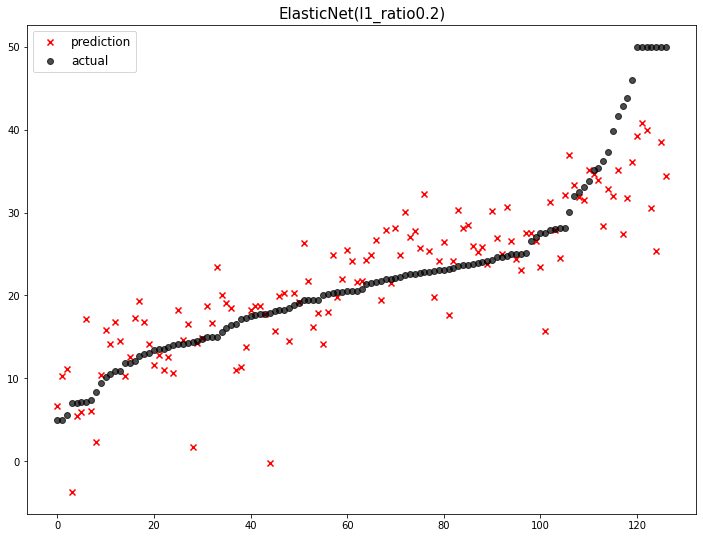

                      model        mse
0          Lasso(alpha=100)  82.434151
1           Lasso(alpha=10)  51.397542
2            Lasso(alpha=1)  39.093494
3   ElasticNet(l1_ratio0.2)  36.111445
4          Ridge(alpha=100)  34.931758
5          Lasso(alpha=0.1)  32.703992
6           Ridge(alpha=10)  32.042623
7            Ridge(alpha=1)  30.743161
8         Lasso(alpha=0.01)  30.438067
9          Ridge(alpha=0.1)  30.225624
10       Lasso(alpha=0.001)  30.178342
11        Ridge(alpha=0.01)  30.160783
12      Lasso(alpha=0.0001)  30.156011
13       Ridge(alpha=0.001)  30.154292
14      Ridge(alpha=0.0001)  30.153643
15         LinearRegression  30.153571


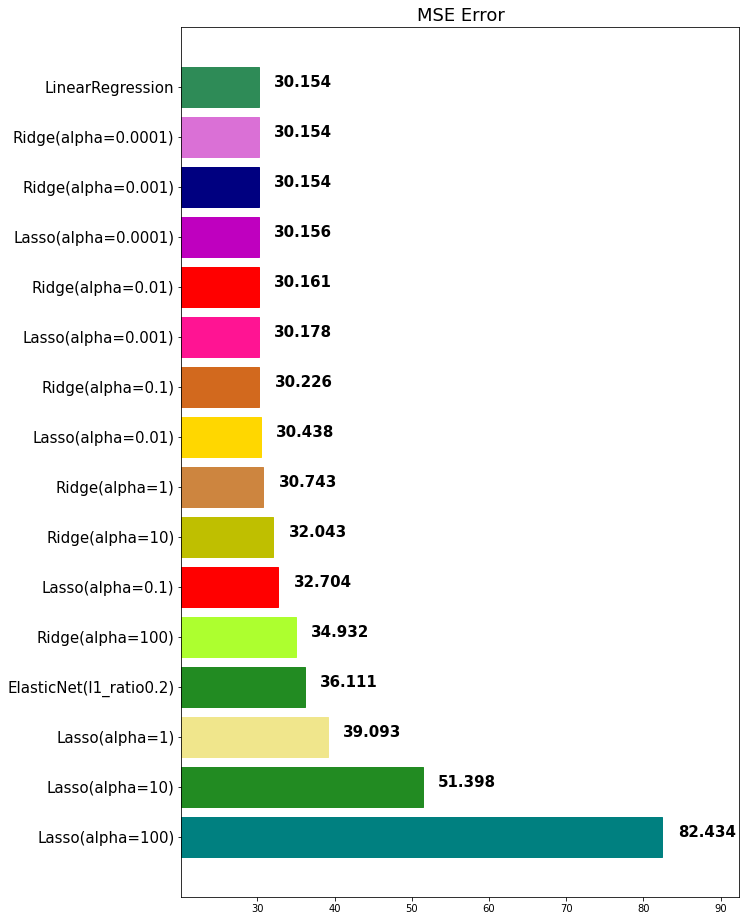

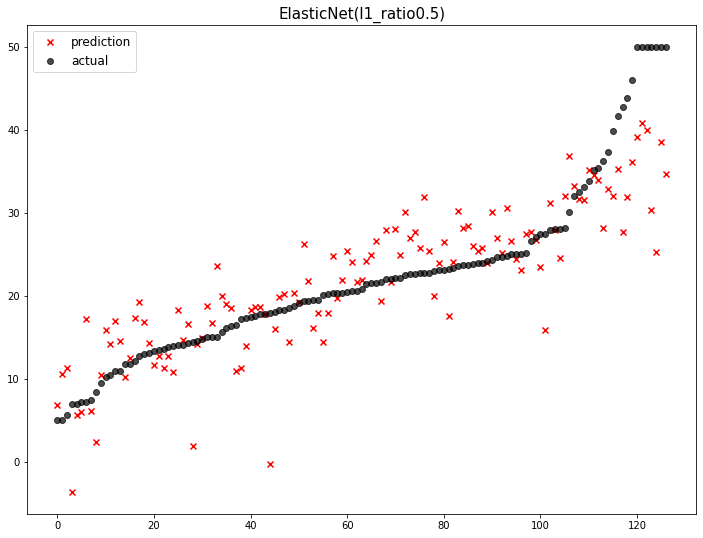

                      model        mse
0          Lasso(alpha=100)  82.434151
1           Lasso(alpha=10)  51.397542
2            Lasso(alpha=1)  39.093494
3   ElasticNet(l1_ratio0.2)  36.111445
4   ElasticNet(l1_ratio0.5)  35.892217
5          Ridge(alpha=100)  34.931758
6          Lasso(alpha=0.1)  32.703992
7           Ridge(alpha=10)  32.042623
8            Ridge(alpha=1)  30.743161
9         Lasso(alpha=0.01)  30.438067
10         Ridge(alpha=0.1)  30.225624
11       Lasso(alpha=0.001)  30.178342
12        Ridge(alpha=0.01)  30.160783
13      Lasso(alpha=0.0001)  30.156011
14       Ridge(alpha=0.001)  30.154292
15      Ridge(alpha=0.0001)  30.153643
16         LinearRegression  30.153571


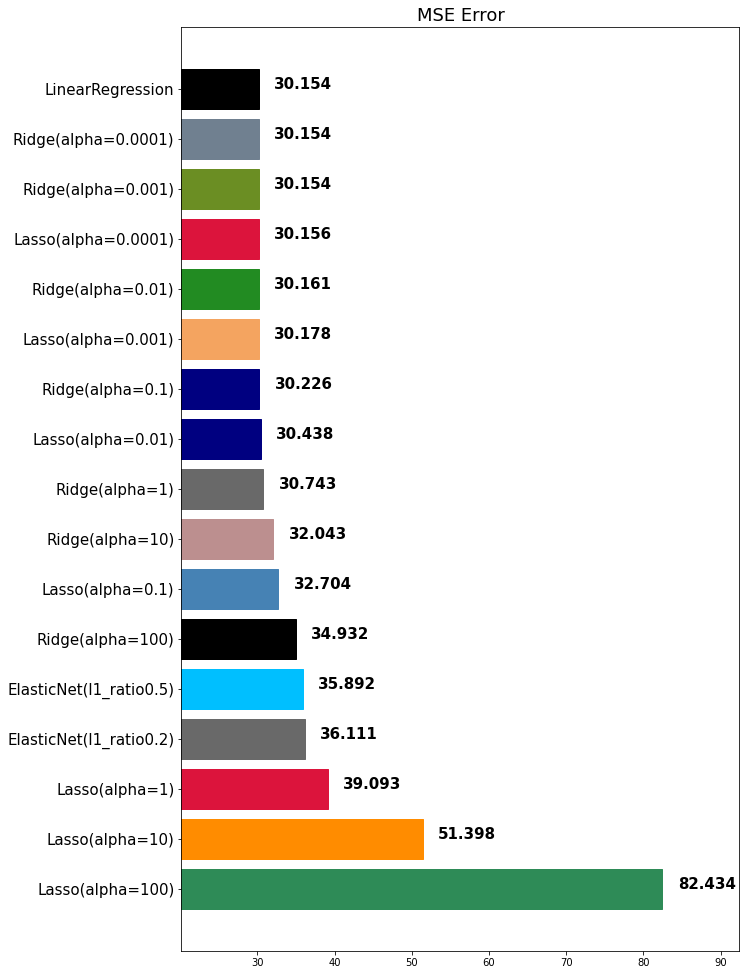

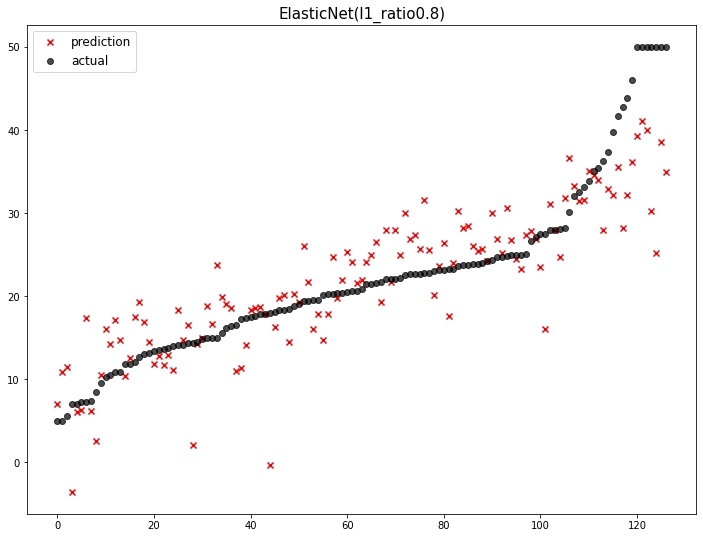

                      model        mse
0          Lasso(alpha=100)  82.434151
1           Lasso(alpha=10)  51.397542
2            Lasso(alpha=1)  39.093494
3   ElasticNet(l1_ratio0.2)  36.111445
4   ElasticNet(l1_ratio0.5)  35.892217
5   ElasticNet(l1_ratio0.8)  35.437792
6          Ridge(alpha=100)  34.931758
7          Lasso(alpha=0.1)  32.703992
8           Ridge(alpha=10)  32.042623
9            Ridge(alpha=1)  30.743161
10        Lasso(alpha=0.01)  30.438067
11         Ridge(alpha=0.1)  30.225624
12       Lasso(alpha=0.001)  30.178342
13        Ridge(alpha=0.01)  30.160783
14      Lasso(alpha=0.0001)  30.156011
15       Ridge(alpha=0.001)  30.154292
16      Ridge(alpha=0.0001)  30.153643
17         LinearRegression  30.153571


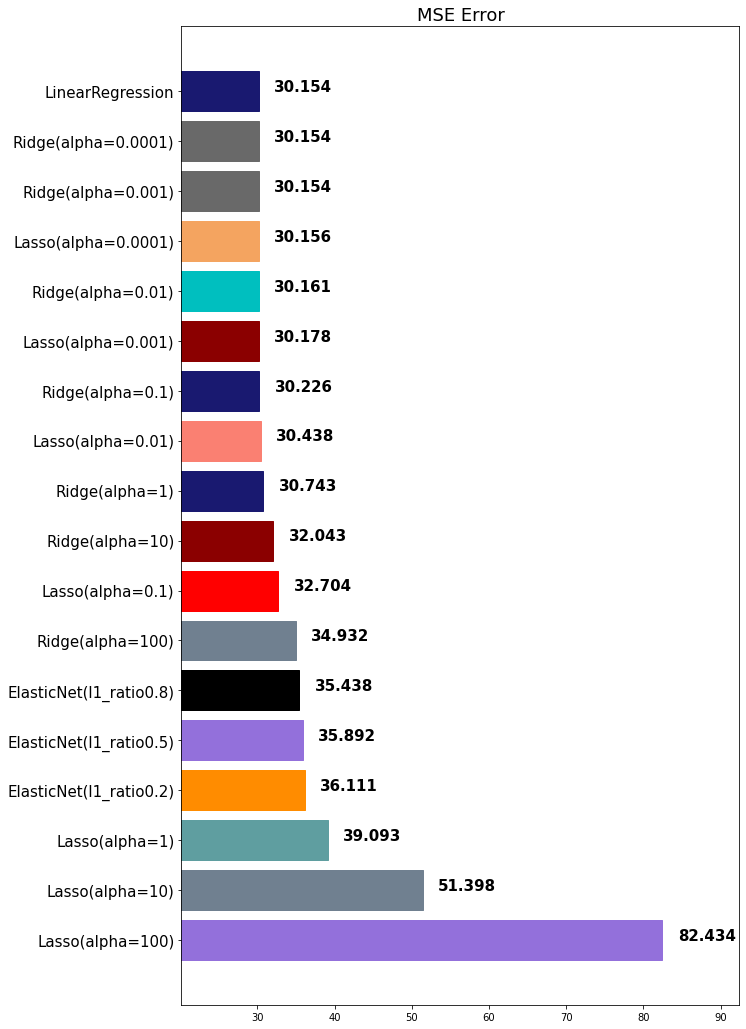

In [48]:
for ratio in ratios:
  elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
  elasticnet.fit(x_train, y_train)
  pred = elasticnet.predict(x_test)
  mse_eval('ElasticNet(l1_ratio{})'.format(ratio), pred, y_test)

In [49]:
elasticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elasticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elasticnet_20.predict(x_test)

elasticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elasticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elasticnet_80.predict(x_test)

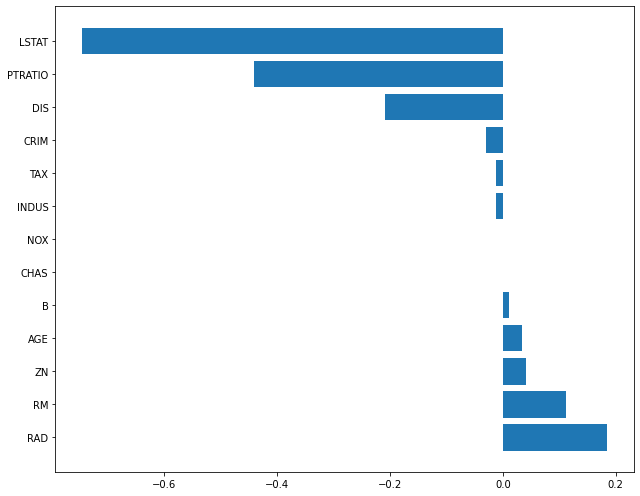

In [50]:
plot_coef(x_train.columns, elasticnet_20.coef_)

In [52]:
elasticnet_20.coef_

array([-0.03041438,  0.04180617, -0.01250375,  0.        , -0.        ,
        0.11195202,  0.03442516, -0.20815805,  0.18527796, -0.01261587,
       -0.4409258 ,  0.01070384, -0.74619078])

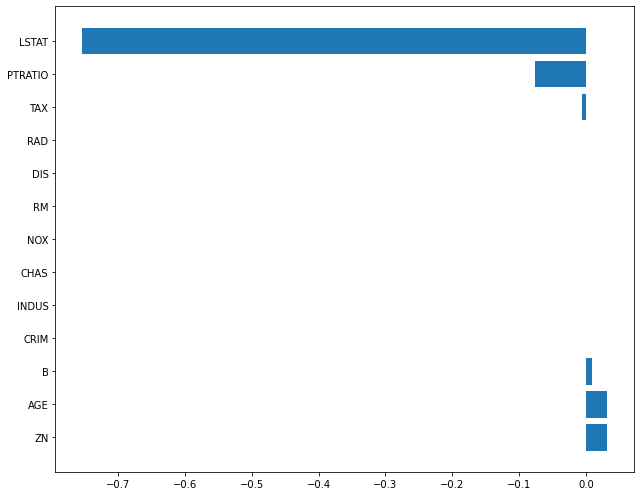

In [51]:
plot_coef(x_train.columns, elasticnet_80.coef_)

In [53]:
elasticnet_80.coef_

array([-0.        ,  0.03223898, -0.        ,  0.        ,  0.        ,
        0.        ,  0.03213638, -0.        ,  0.        , -0.00586465,
       -0.07631903,  0.00946249, -0.75458856])

# **6. Scaler**

In [54]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [55]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.108238,11.627968,10.921768,0.076517,0.550654,6.269881,67.283377,3.898373,9.350923,404.000000,18.490765,359.345831,12.285356
std,7.700278,23.464937,6.729219,0.266175,0.114626,0.704117,27.796599,2.116285,8.663664,165.943287,2.124372,87.881805,6.700207
min,0.006320,0.000000,1.220000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.076890,0.000000,5.190000,0.000000,0.449000,5.878500,44.050000,2.183950,4.000000,279.000000,17.400000,375.695000,7.025000
50%,0.245220,0.000000,8.560000,0.000000,0.532000,6.195000,74.400000,3.370000,5.000000,330.000000,19.000000,391.430000,11.380000
75%,3.397665,12.500000,18.100000,0.000000,0.624000,6.618500,92.650000,5.259200,24.000000,666.000000,20.200000,396.290000,16.170000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### **6-1. StandardScaler**
* 평균(mean)을 0, 표준편차(std)를 1로 만들어주는 스케일러(Scaler)

In [56]:
std_scaler = StandardScaler()

In [57]:
std_scaled = std_scaler.fit_transform(x_train)

In [58]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.40,-0.50,-1.44,-0.29,-1.45,-3.85,-2.21,-1.31,-0.97,-1.31,-2.78,-4.09,-1.58
25%,-0.39,-0.50,-0.85,-0.29,-0.89,-0.56,-0.84,-0.81,-0.62,-0.75,-0.51,0.19,-0.79
50%,-0.37,-0.50,-0.35,-0.29,-0.16,-0.11,0.26,-0.25,-0.50,-0.45,0.24,0.37,-0.14
75%,0.04,0.04,1.07,-0.29,0.64,0.50,0.91,0.64,1.69,1.58,0.81,0.42,0.58
max,11.17,3.77,2.50,3.47,2.80,3.57,1.18,3.89,1.69,1.85,1.65,0.43,3.84


### **6-2. MinMaxScaler**
* min값과 max값을 0 ~ 1 사이로 정규화

In [59]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [60]:
round(pd.DataFrame(minmax_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.03,0.12,0.37,0.08,0.34,0.52,0.65,0.25,0.36,0.41,0.63,0.91,0.29
std,0.09,0.23,0.25,0.27,0.24,0.13,0.30,0.19,0.38,0.32,0.23,0.22,0.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.15,0.00,0.13,0.44,0.40,0.10,0.13,0.18,0.51,0.95,0.15
50%,0.00,0.00,0.28,0.00,0.30,0.50,0.73,0.20,0.17,0.27,0.68,0.99,0.27
75%,0.04,0.12,0.64,0.00,0.49,0.59,0.92,0.38,1.00,0.91,0.81,1.00,0.40
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### **6-3. RobustScaler**
* 중앙값(median)이 0, IQR(interquartile range)이 되도록 변환
* outlier 값 처리에 유용

In [61]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [62]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

# **7. 파이프라인**

In [63]:
from sklearn.pipeline import make_pipeline

In [65]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [66]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

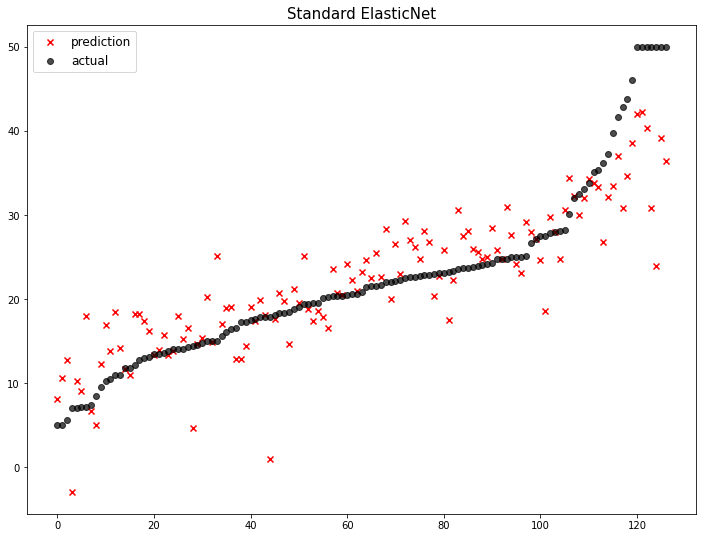

                      model        mse
0          Lasso(alpha=100)  82.434151
1           Lasso(alpha=10)  51.397542
2            Lasso(alpha=1)  39.093494
3   ElasticNet(l1_ratio0.2)  36.111445
4   ElasticNet(l1_ratio0.5)  35.892217
5   ElasticNet(l1_ratio0.8)  35.437792
6          Ridge(alpha=100)  34.931758
7          Lasso(alpha=0.1)  32.703992
8           Ridge(alpha=10)  32.042623
9            Ridge(alpha=1)  30.743161
10      Standard ElasticNet  30.667452
11        Lasso(alpha=0.01)  30.438067
12         Ridge(alpha=0.1)  30.225624
13       Lasso(alpha=0.001)  30.178342
14        Ridge(alpha=0.01)  30.160783
15      Lasso(alpha=0.0001)  30.156011
16       Ridge(alpha=0.001)  30.154292
17      Ridge(alpha=0.0001)  30.153643
18         LinearRegression  30.153571


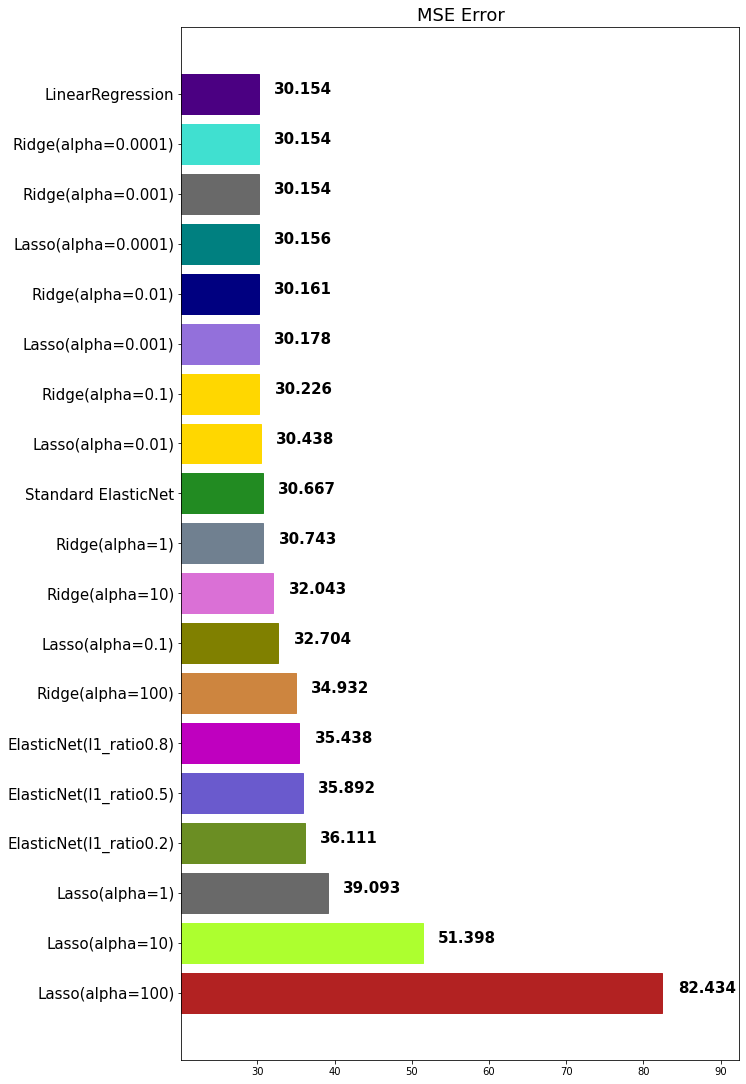

In [67]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

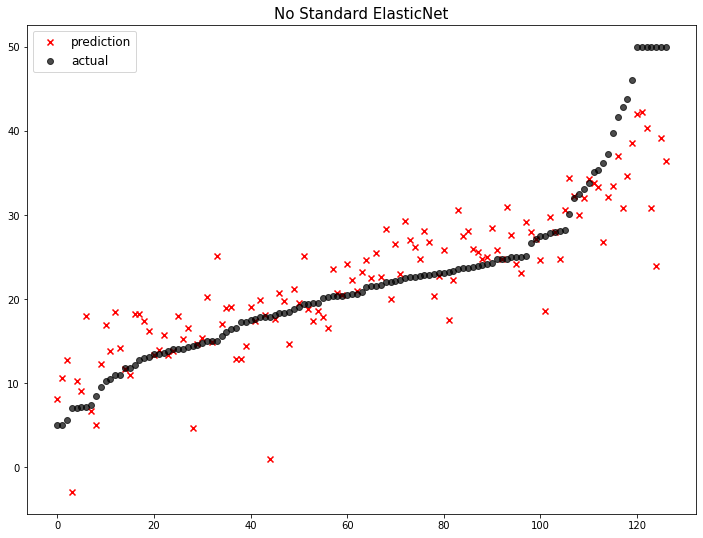

                      model        mse
0          Lasso(alpha=100)  82.434151
1           Lasso(alpha=10)  51.397542
2            Lasso(alpha=1)  39.093494
3   ElasticNet(l1_ratio0.2)  36.111445
4   ElasticNet(l1_ratio0.5)  35.892217
5   ElasticNet(l1_ratio0.8)  35.437792
6          Ridge(alpha=100)  34.931758
7          Lasso(alpha=0.1)  32.703992
8           Ridge(alpha=10)  32.042623
9            Ridge(alpha=1)  30.743161
10      Standard ElasticNet  30.667452
11   No Standard ElasticNet  30.667452
12        Lasso(alpha=0.01)  30.438067
13         Ridge(alpha=0.1)  30.225624
14       Lasso(alpha=0.001)  30.178342
15        Ridge(alpha=0.01)  30.160783
16      Lasso(alpha=0.0001)  30.156011
17       Ridge(alpha=0.001)  30.154292
18      Ridge(alpha=0.0001)  30.153643
19         LinearRegression  30.153571


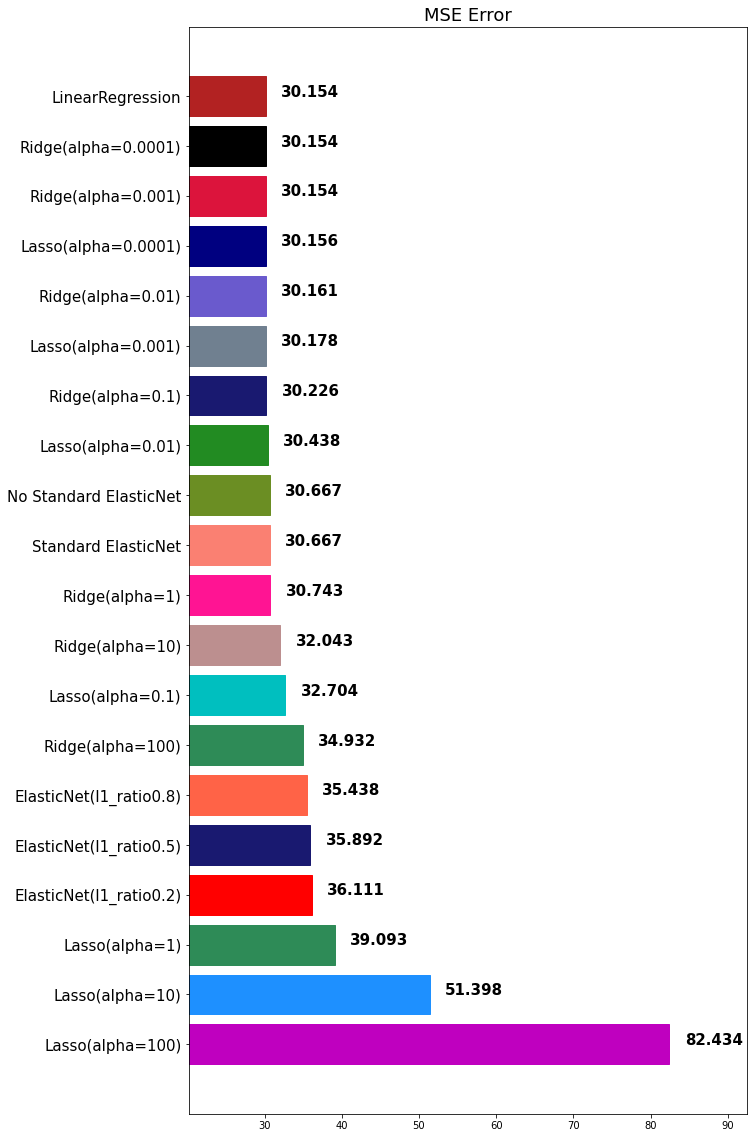

In [68]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

# **8. Polynomial Features**
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)
* 다항식의 계수간 상호작용을 통해 새로운 feature를 생성
* [a, b] 2개의 feature가 존재할 때 degree=2로 설정하면 polynomial features는 [1, a, b, $a^2$, ab, $b^2$]가 됨

In [69]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [72]:
poly_features = poly.fit_transform(x_train)[0]

In [73]:
poly_features

array([     0.0578    ,      0.        ,      2.46      ,      0.        ,
            0.488     ,      6.98      ,     58.4       ,      2.829     ,
            3.        ,    193.        ,     17.8       ,    396.9       ,
            5.04      ,      0.00334084,      0.        ,      0.142188  ,
            0.        ,      0.0282064 ,      0.403444  ,      3.37552   ,
            0.1635162 ,      0.1734    ,     11.1554    ,      1.02884   ,
           22.94082   ,      0.291312  ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      6.0516    ,      0.        ,
            1.20048   ,     17.1708    ,    143.664     ,      6.95934   ,
            7.38      ,    474.78      ,     43.788     ,    976.374     ,
           12.3984    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [74]:
x_train.iloc[0]

CRIM         0.0578
ZN           0.0000
INDUS        2.4600
CHAS         0.0000
NOX          0.4880
RM           6.9800
AGE         58.4000
DIS          2.8290
RAD          3.0000
TAX        193.0000
PTRATIO     17.8000
B          396.9000
LSTAT        5.0400
Name: 179, dtype: float64

In [75]:
# 복합적으로 사용하기
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [76]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.433e+01, tolerance: 2.876e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


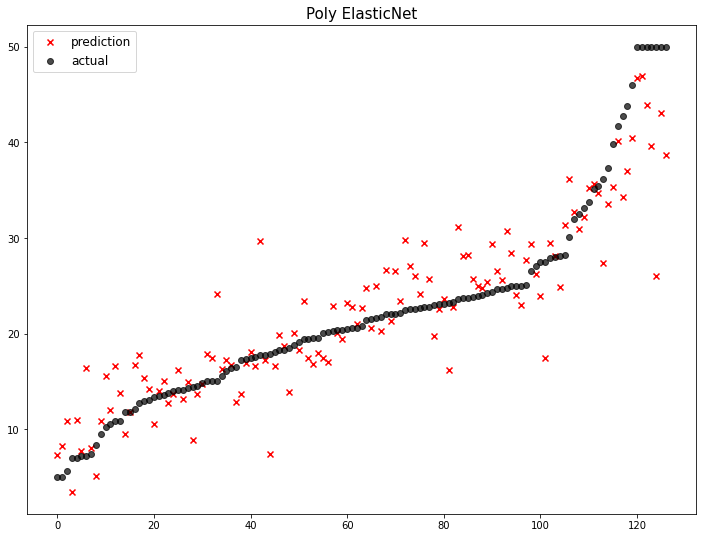

                      model        mse
0          Lasso(alpha=100)  82.434151
1           Lasso(alpha=10)  51.397542
2            Lasso(alpha=1)  39.093494
3   ElasticNet(l1_ratio0.2)  36.111445
4   ElasticNet(l1_ratio0.5)  35.892217
5   ElasticNet(l1_ratio0.8)  35.437792
6          Ridge(alpha=100)  34.931758
7          Lasso(alpha=0.1)  32.703992
8           Ridge(alpha=10)  32.042623
9            Ridge(alpha=1)  30.743161
10      Standard ElasticNet  30.667452
11   No Standard ElasticNet  30.667452
12        Lasso(alpha=0.01)  30.438067
13         Ridge(alpha=0.1)  30.225624
14       Lasso(alpha=0.001)  30.178342
15        Ridge(alpha=0.01)  30.160783
16      Lasso(alpha=0.0001)  30.156011
17       Ridge(alpha=0.001)  30.154292
18      Ridge(alpha=0.0001)  30.153643
19         LinearRegression  30.153571
20          Poly ElasticNet  20.930852


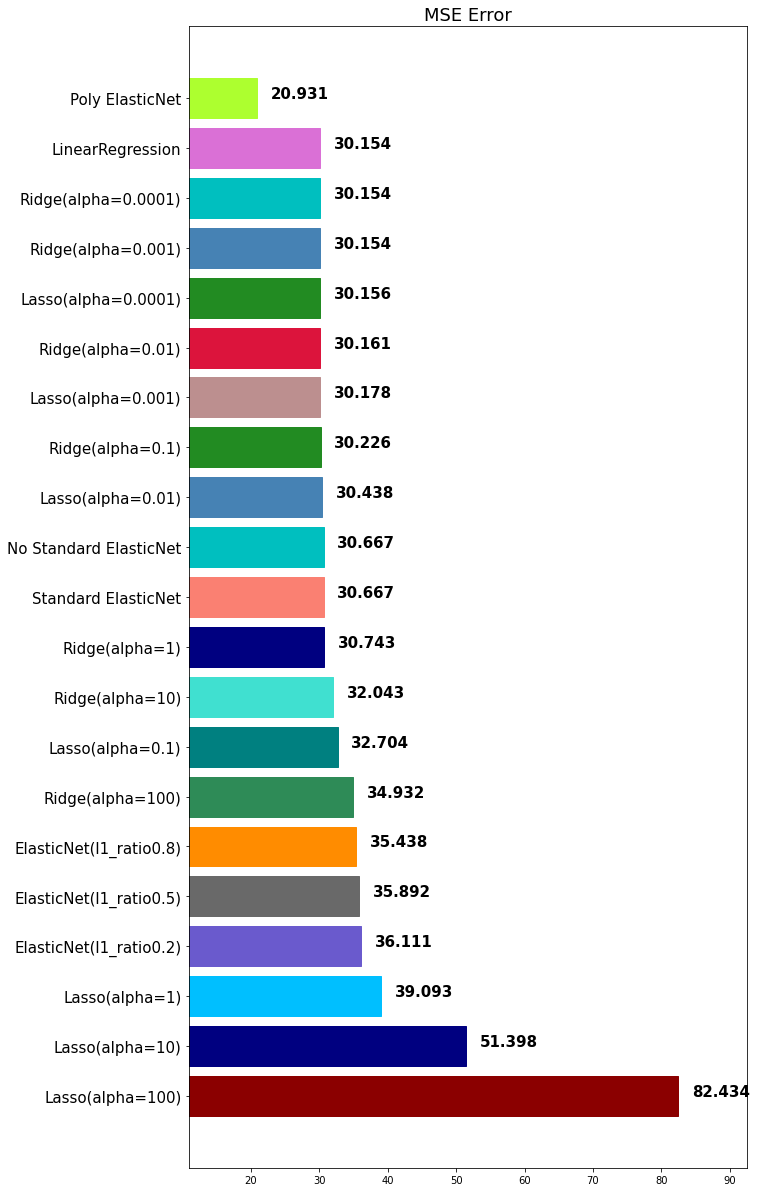

In [77]:
mse_eval('Poly ElasticNet', poly_pred, y_test)